## Train a neural network to model a sinusoid

In [1]:
#

import numpy as np

import matplotlib.pyplot as plt

from neuralnetwork.neural_network_module import NeuralNetwork, Layer

np.random.seed(101)

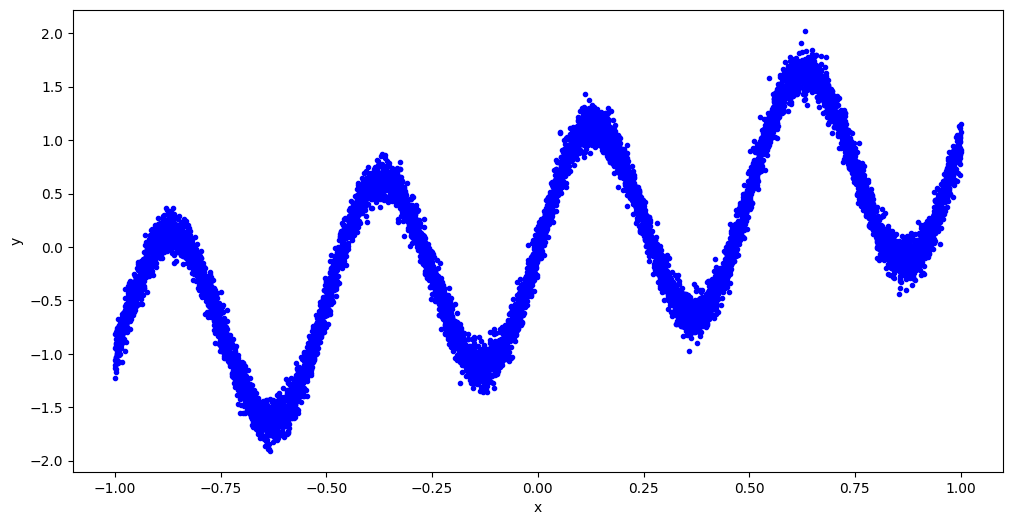

[ 0.03279726  0.14133517 -0.94305155 ...  0.11742265 -0.82103565
  0.81617897]
[ 0.60948414  1.05861385 -0.42952505 ...  1.14405459 -0.07327606
  0.11562186]


In [2]:
# Create data for sinusoid

N = int(1e4) # number of samples

f = 2 # sinusoid frequency

xx = 2*(np.random.rand(N) - 0.5)

yy = xx + np.sin(2*np.pi*f*xx) + 0.10*np.random.randn(N) # create sinusoid and add Gaussian noise

plt.figure(figsize=(12,6))
# plt.plot(xx[:,0],yy[:,0])
plt.plot(xx,yy,"b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# for kx in np.arange(-1,1.25,0.25):
#     idx = abs(xx[:,0] - kx) <= 0.1/2
#     yy[idx,0] = 0.5
#     idx = abs(xx[:,0] - kx) <= 0.05/2
#     yy[idx,0] = 1
# for ky in np.arange(-1,1.25,0.25):
#     idx = abs(xx[:,1] - ky) <= 0.1/2
#     yy[idx,1] = 0.5
#     idx = abs(xx[:,1] - ky) <= 0.05/2
#     yy[idx,1] = 1

print(xx)
print(yy)

In [3]:
np.linspace(-1,1,N)

array([-1.        , -0.99979998, -0.99959996, ...,  0.99959996,
        0.99979998,  1.        ])

In [4]:
# Reshape xx and yy, and split into training and test sets

# reshape xx and yy
xx = xx.reshape(-1,1)
yy = yy.reshape(-1,1)


# split into train and test sets
idx_train = range(0,int(0.8*xx.shape[0])) # training set indexes
xx_train = xx[idx_train,:]
yy_train = yy[idx_train,:]

idx_test = range(int(0.8*xx.shape[0]),xx.shape[0]) # test set indexes
xx_test = xx[idx_test,:]
yy_test = yy[idx_test,:]


In [5]:
# nn = NeuralNetwork()
# layer_list = []
# layer_list.append(Layer(1, None)) # input layer
# for k1 in range(0,4):
#     layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(1, "tanh")) # output layer

# nn._set_layers(layer_list) # set layer list

# nn._compute_output(xx_train).shape

# # xx_train.shape

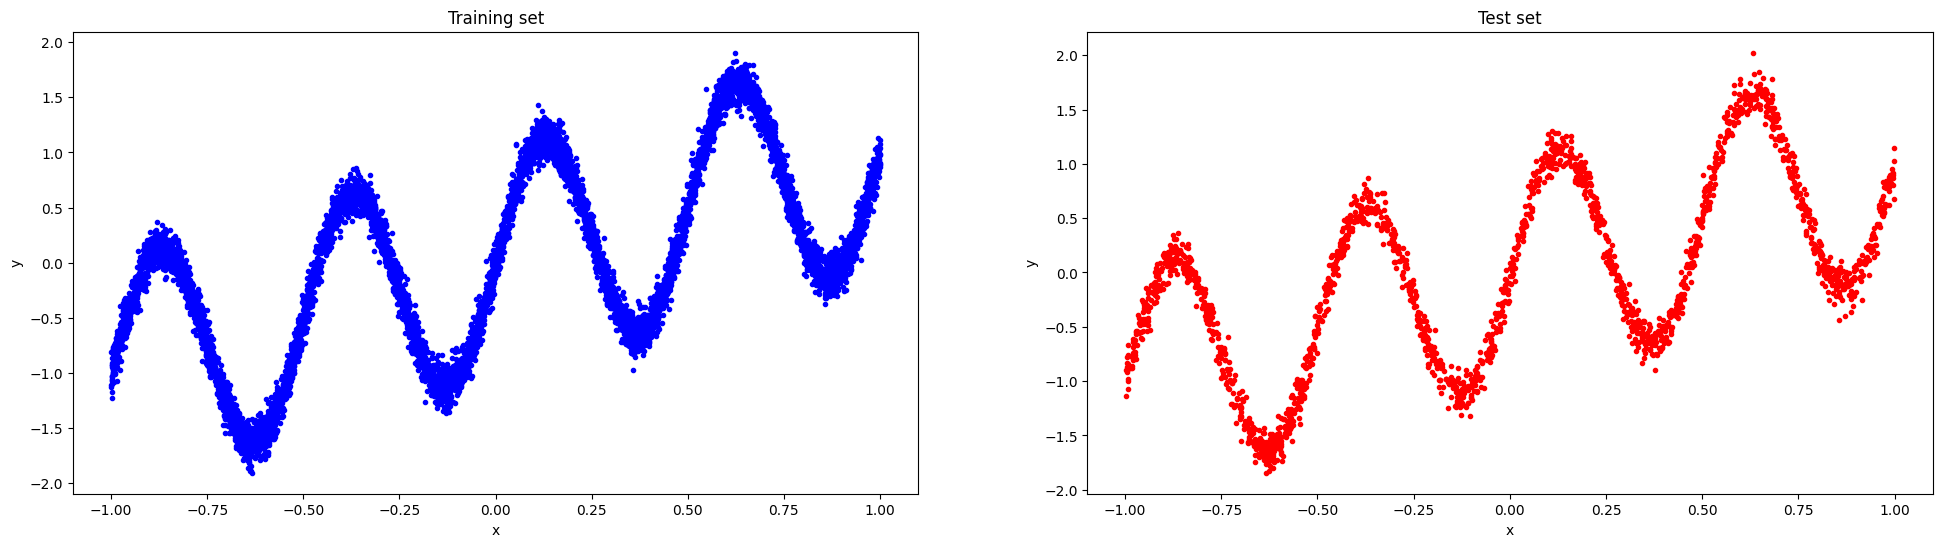

In [6]:
# Plot training and test sets

plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
plt.plot(xx_train[:,0],yy_train[:,0],"b.")
plt.title("Training set")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,2,2)
plt.plot(xx_test[:,0],yy_test[:,0],"r.")
plt.title("Test set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [7]:
# Create functions to compute NN acuracy, and perform gradient descent

# Compute accuracy of NN using L2 norm
def get_accuracy(Y_pred, Y):
    # print("Predictions:", Y_pred)
    # print("Values:", Y)
    return np.sum((Y_pred - Y)**2)/Y.size

def get_loss(Y_pred, Y):
    return np.sum((Y_pred - Y)**2)/Y.size

# Gradient descent
def gradient_descent(NN: "NeuralNetwork", X, Y, alpha, iterations=1000, intervals=100):
    print(f"\nStarting training of {nn.name}")
    # iterate through data points
    for k1 in range(iterations):
        NN._compute_output(X) # make prediction for all data points
        NN._train_step(X, Y, alpha) # compute gradients and apply gradient descent
        Y_pred = NN._compute_output(X) # make prediction after gradient descent step
        if k1 % intervals == 0 or k1 == iterations:
            print(f"Iteration: {k1} | Train loss: {get_loss(Y_pred, Y):0.6f}")


In [8]:
# Create NN and train

# nn = NeuralNetwork()
# layer_list = []
# layer_list.append(Layer(1, None))
# layer_list.append(Layer(8, "linear"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(8, "tanh"))
# layer_list.append(Layer(1, "tanh"))

nn = NeuralNetwork()
layer_list = []
layer_list.append(Layer(1, None)) # input layer
for k1 in range(0,8):
    layer_list.append(Layer(8, "tanh"))
layer_list.append(Layer(8, "linear")) # output layer
layer_list.append(Layer(1, "linear")) # output layer

nn._set_layers(layer_list) # set layer list

gradient_descent(nn, xx_train, yy_train, 0.1, 5000, 1000) # train NN

print("")
print("Training Complete")
print(f"Train accuracy: {get_loss(nn._compute_output(xx_train), yy_train):0.6f}")
print(f"Test accuracy: {get_loss(nn._compute_output(xx_test), yy_test):0.6f}")

Neural Network NN01 initialized
Layer L01 initialized | Type: None | Neurons: 1
Layer L02 initialized | Type: None | Neurons: 8
Layer L03 initialized | Type: None | Neurons: 8
Layer L04 initialized | Type: None | Neurons: 8
Layer L05 initialized | Type: None | Neurons: 8
Layer L06 initialized | Type: None | Neurons: 8
Layer L07 initialized | Type: None | Neurons: 8
Layer L08 initialized | Type: None | Neurons: 8
Layer L09 initialized | Type: None | Neurons: 8
Layer L10 initialized | Type: None | Neurons: 8
Layer L11 initialized | Type: None | Neurons: 1

Starting training of NN01
Iteration: 0 | Train loss: 1.773671
Iteration: 1000 | Train loss: 0.452732
Iteration: 2000 | Train loss: 0.373216


In [ ]:
# Plot preidctions for training and test sets

plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
plt.plot(xx_train[:,0], yy_train[:,0],"b.")
plt.plot(xx_train[:,0], nn._compute_output(xx_train)[:,0],"g.")
plt.title("Training set")
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1,2,2)
plt.plot(xx_test[:,0], yy_test[:,0],"r.")
plt.plot(xx_test[:,0], nn._compute_output(xx_test)[:,0],"g.")
plt.title("Test set")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
